# -------------------  Android Devices Exploratory Data Analysis📱---------------------

<img src="android.jpg" alt="Alt Text" width="1000" height="500">



### Importing necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn  as sns
import warnings as ws
ws.filterwarnings("ignore")

### importing  data in CSV format

In [3]:
data = pd.read_csv("C:/Users/abdelrahman  hassan/Desktop/pyhton/mobiles.csv")

In [4]:
data

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot
...,...,...,...,...,...,...,...,...,...,...
979,2000 mAh Battery,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,NaN
980,2680 mAh Li-Ion Battery,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year
981,4550 mAh Battery,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...
982,2100 mAh Li-Ion Battery,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty


In [5]:
data.shape

(984, 10)

## Data cleaning

In [6]:
data.duplicated().sum()

24

In [7]:
data =data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

### Finding the number of missing values in the dataset

In [9]:
data.isnull().sum()

battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        12
reviews       12
warranty     145
dtype: int64

###### We notice data have missing values at coulmn [Processor , Rating, Reviews,Warranty]
###### We shall only fill in the missing values with the most repeated element in the attribute in most cases

# processor


In [10]:
data['processor'].value_counts().reset_index().sort_values(by='count',ascending=False)


,processor,count
0,Qualcomm Snapdragon 730G Processor,21
1,1 year manufacturer warranty for device and 6 ...,20
2,Qualcomm Snapdragon 665 Processor,18
3,MediaTek Helio G90T Processor,18
4,1 Year Manufacturer Warranty,16
...,...,...
207,MT6582 Processor,1
206,"12 Months on handset, 6 Months on battery , 6 ...",1
205,"Octa Core Processor MediaTek MT6750, 1.5GHz Pr...",1
204,ARM Cortex-A53 (MediaTek MT6752 64-bit 4G LTE)...,1


In [11]:
data['processor'].fillna('Qualcomm Snapdragon 730G Processor',inplace=True)

# Rating

In [12]:
data['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)

,rating,count
0,4.4,235
1,4.5,181
2,4.3,159
3,4.1,81
4,4.2,80
5,4.0,35
6,3.9,34
7,3.8,30
8,4.6,26
9,3.6,24


In [13]:
data['rating'].fillna(4.4,inplace=True)

# Reviews

In [14]:
data['reviews'].value_counts().reset_index().sort_values(by='count',ascending=False)

,reviews,count
0,3 Reviews,10
2,8 Reviews,9
3,31 Reviews,9
1,1 Reviews,9
4,2 Reviews,8
...,...,...
300,234 Reviews,1
299,192 Reviews,1
298,"1,332 Reviews",1
297,"8,026 Reviews",1


In [15]:
data['reviews'].fillna('1 Reviews',inplace=True)

# warranty


In [16]:
data['warranty'].value_counts().reset_index().sort_values(by='count',ascending=False)

,warranty,count
0,Brand Warranty of 1 Year Available for Mobile ...,316
1,1 year manufacturer warranty for device and 6 ...,36
2,Brand Warranty of 1 Year Available for Mobile ...,32
3,Brand Warranty of 1 Year,27
4,1 Year Manufacturer Warranty for Phone and 6 M...,23
...,...,...
78,Brand Warranty of 1 Year + Extended 1 Year,1
77,1 year manufactuer warranty for device and 6 m...,1
76,1 Year manufacturer warranty for device and 6 ...,1
75,1 Year Manufacturer Warranty for Device and 6 ...,1


In [17]:
data['warranty'].fillna('Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',inplace=True)

In [18]:
data.isnull().sum()

battery      0
camera       0
display      0
memory       0
name         0
price        0
processor    0
rating       0
reviews      0
warranty     0
dtype: int64

In [19]:
data.dtypes

battery       object
camera        object
display       object
memory        object
name          object
price          int64
processor     object
rating       float64
reviews       object
warranty      object
dtype: object

# Feature Engineering


# Battery

###### We  will convert the battery column into two columns namely battery_value and li-ion whether battery is lithium ion or not.We the drop the                                                                                                      battery column.


In [20]:
data['battery']=[a.replace('mAh Battery','') for a in data['battery']]


In [21]:
data['battery']

0                        5000 
1                        5000 
2                        5000 
3                        5000 
4                        4000 
                ...           
979                      2000 
980    2680 mAh Li-Ion Battery
981                      4550 
982    2100 mAh Li-Ion Battery
983                      3000 
Name: battery, Length: 960, dtype: object

#### check if battery is li- ion or not

In [22]:
data['li-ion']=(data['battery'].str.find("Li-Ion"))
data['li-ion'].reset_index()

,index,li-ion
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
955,979,-1
956,980,9
957,981,-1
958,982,9


### convert li-ion  from str to boolean

In [23]:
data['li-ion']=(data['li-ion']!=-1)

In [24]:
data['battery_value']=[a.split()[0] for a in data['battery']]

In [25]:
data['battery_value']=data['battery_value'].astype(int)

### remove battary column  after spliting to [li-ion,battery_value ]

In [26]:
data.drop(columns=['battery'],inplace=True)

In [27]:
data

,camera,display,memory,name,price,processor,rating,reviews,warranty,li-ion,battery_value
0,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...,False,5000
1,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design,False,5000
2,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,False,5000
3,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,False,5000
4,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot,False,4000
...,...,...,...,...,...,...,...,...,...,...,...
979,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...,False,2000
980,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year,True,2680
981,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...,False,4550
982,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty,True,2100


# memory

### We will convert the memory column into two columns namely Ram_IN_gb and Rom_in_gb  .We will  drop the memory  column.

In [28]:
data['RAM_in_GB']=[a.split('|')[0].replace('GB RAM','').replace('512 MB RAM','0.512').replace('32 MB RAM','0.032').replace('256 MB RAM','0.256') for a in data['memory']]
data['ROM_in_GB']=[a.split('|')[1].replace('GB ROM','').replace('32 MB ROM','0.32').replace('512 MB ROM','0.512') for a in data['memory']]

In [29]:
data["RAM_in_GB"].tail(30)

954       3  
955       4  
956       6  
957       4  
958       2  
959       6  
960       4  
961       2  
962    0.512 
963       3  
964       2  
965       3  
966       3  
967       4  
968       1  
969    0.512 
970       4  
971       6  
972       3  
973       4  
974       6  
975       6  
976       6  
977       2  
978       1  
979       1  
980       3  
981       4  
982       1  
983       4  
Name: RAM_in_GB, dtype: object

In [30]:
data['RAM_in_GB']=data['RAM_in_GB'].astype(float)
data['ROM_in_GB']=data['ROM_in_GB'].astype(float)

In [31]:
data.drop(columns=['memory'],inplace=True)

In [32]:
data

,camera,display,name,price,processor,rating,reviews,warranty,li-ion,battery_value,RAM_in_GB,ROM_in_GB
0,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...,False,5000,4.0,64.0
1,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design,False,5000,4.0,64.0
2,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,False,5000,4.0,128.0
3,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,False,5000,4.0,128.0
4,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot,False,4000,3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...,False,2000,1.0,8.0
980,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year,True,2680,3.0,32.0
981,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...,False,4550,4.0,64.0
982,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty,True,2100,1.0,8.0


# Name

### we will convert name column to three column [brand , color ,model] then we will drop name column

In [33]:
data['brand']=[a.split()[0] for a in data['name']]
data['colour']=[a.split()[3] for a in data['name']]
data['model']=[a.split()[1] for a in data['name']]

In [34]:
data['colour']=[a.replace('(','').replace('32','no colour').replace(',','') for a in data['colour']]

In [35]:
data.drop(columns=['name'],inplace=True)

# processor


### we will convert processor column to three column [processor_name]  by  splitting it then we will drop processor column

In [36]:
data['processor_name']=[a.split()[0] for a in data['processor']]
data.drop(columns=['processor'],inplace=True)

# camera

### we will  split camera column  to  two column  raer  and front then  will  drop camera column

In [37]:
data['rear_in_mp']=[a.split('|')[0].replace('Rear Camera','').replace('MP','') for a in data['camera']]
data['front_in_mp']=[a.split('|')[-1].replace('Front Camera','').replace('MP','') for a in data['camera']]

In [38]:
data.drop(columns=['camera'],inplace=True)

# reviews

In [39]:
data['reviews']=[a.replace('Reviews','').replace(',','') for a in data['reviews']]
data["reviews"].astype(int)

0      55078
1      20062
2      20062
3      20062
4      10091
       ...  
979      105
980      516
981      710
982       81
983     2331
Name: reviews, Length: 960, dtype: int32

# display

In [40]:
data['display_quality']=[a.split()[4] for a in data['display']]
data['display_size_in_cm']=[a.split()[0] for a in data['display']]
data['display_size_in_cm']=data['display_size_in_cm'].astype(float)
data.drop(columns=['display'],inplace=True)

In [41]:
data

,price,rating,reviews,warranty,li-ion,battery_value,RAM_in_GB,ROM_in_GB,brand,colour,model,processor_name,rear_in_mp,front_in_mp,display_quality,display_size_in_cm
0,9999,4.4,55078,Brand Warranty of 1 Year Available for Mobile ...,False,5000,4.0,64.0,Redmi,Red,8,Qualcomm,12 + 2,8,HD+,15.80
1,10999,4.5,20062,Sunrise Design,False,5000,4.0,64.0,Realme,Blue,5i,Qualcomm,12 + 8 + 2 + 2,8,HD+,16.56
2,11999,4.5,20062,Sunrise Design,False,5000,4.0,128.0,Realme,Blue,5i,Qualcomm,12 + 8 + 2 + 2,8,HD+,16.56
3,11999,4.5,20062,Sunrise Design,False,5000,4.0,128.0,Realme,Green,5i,Qualcomm,12 + 8 + 2 + 2,8,HD+,16.56
4,7499,4.4,10091,Dual Nano SIM slots and Memory Card Slot,False,4000,3.0,32.0,Realme,Blue,C2,MediaTek,13 + 2,5,HD+,15.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,3590,3.8,105,Brand Warranty of 1 Year Available for Mobile ...,False,2000,1.0,8.0,Micromax,Black,Bharat,12,5,2,FWVGA,12.70
980,19999,4.0,516,Brand Warranty of 1 Year,True,2680,3.0,32.0,Nextbit,no colour,Robin,Qualcomm,13,5,Full,13.21
981,10499,4.1,710,Brand Warranty of 1 Year Available for Mobile ...,False,4550,4.0,64.0,Gionee,Mocha,A1,Helio,13 + 5,20,Full,15.24
982,8990,3.8,81,1 Year Manufacturer Warranty,True,2100,1.0,8.0,XOLO,Black,Omega,MTK,8,2,HD,12.70


#### So we now have newly created features like battery_value , display_quality , diplay_size , RAM , ROM , brand , colour , model , processor_name , rear_in_mp , front_in_mp using the previously given features.

# descriptive statistics


In [42]:
data["reviews"].astype(int).mean().round()

6019.0

##### we conclude that the avg reviews on smart phone is 6019


In [43]:
nmp=data.groupby("brand")["model"].count().reset_index().sort()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
nmp.sort_values(by='model', ascending=True)

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=nmp["model"],y=nmp["brand"])


### we conclude that We find that samsung(133) and redmi(124) brands have been leading in android sales in India followed by realmi , OPPO and Vivo


In [ ]:
data['li-ion'].value_counts().reset_index()

In [ ]:

# Plotting the pie chart 
data['li-ion'].value_counts().plot(
    kind='pie', 
    figsize=(5, 5), 
    colors=['teal', 'aqua'], 
    labels=data['li-ion'].value_counts().index,  # Add labels
    autopct='%1.1f%%' ,title ="li-ion battery usage" # Show percentages with 1 decimal place
)



### We find that android with no Li-Ion batteries are very large(917) compared to the ones with lithium ion batteries(43) in the indian market. we conclude that mobile companies use li-ion  battary less

In [ ]:
# Create the horizontal bar plot
az= data['processor_name'].value_counts().plot(kind='barh', figsize=(15, 15), color="skyblue" ,title= "most processor usage")

# Add data labels
for index, value in enumerate(data['processor_name'].value_counts()):
    az.text(value, index, str(value), va='center')



### We find here that Qualcomm processor leads all the processors hands down with a massive majority of above 363.



In [ ]:
df = data[data ["rating"]>4.5][["brand","model","rating","color"]]

In [ ]:
df

In [ ]:
plt.title("highest mobile review in india")
sns.barplot(x=df["model"],y=df["rating"],palette="viridis")
plt.figure(figsize=(10, 20))

#### we conclude that highest  reviews is redmi note

In [ ]:
data["warranty"].value_counts()

### we conclude most mobile have Warranty of 1 Year Available for Mobile and 6 Months for Accessories

# Bivariate analysis

In [ ]:
brand=data.groupby("brand")['price'].mean().sort_values(ascending=False )

In [ ]:
brand.reset_index()

In [44]:
ay= brand.plot(kind='barh', figsize=(15, 15), color="blue",title="relationship beatween brand and price")




NameError: name 'brand' is not defined

#### We find that the average price of the brand "OnePlus" is the highest with price of "40436 rupees" followed by 'iQOO' and 'Google'. The lowest brand price is "2499 rupees" of "Ziox" brand

brand
YUHO         2.80
Ziox         3.10
Blackbear    3.20
Celkon       3.40
Zen          3.45
LYF          3.50
Kenxinda     3.50
VOTO         3.50
Voto         3.55
Alcatel      3.60
Forme        3.60
ZOPO         3.60
Homtom       3.60
Karbonn      3.60
Coolpad      3.70
Intex        3.70
Micromax     3.80
InFocus      3.80
Lava         3.80
Yu           3.80
Comio        3.85
Ringme       3.85
Panasonic    3.90
Mobiistar    3.90
XOLO         3.90
Meizu        3.95
LG           4.00
Nextbit      4.00
Lenovo       4.05
Gionee       4.05
vivo         4.10
Gome         4.10
Itel         4.10
ITEL         4.10
Moto         4.10
Nokia        4.10
Tecno        4.15
Huawei       4.15
Mi           4.20
Honor        4.30
Samsung      4.30
Asus         4.30
Motorola     4.30
Black        4.40
Redmi        4.40
Infinix      4.40
MI3          4.40
OPPO         4.40
Vivo         4.40
Google       4.50
Realme       4.50
POCO         4.50
iQOO         4.50
OnePlus      4.60
Name: rating, dtype: f

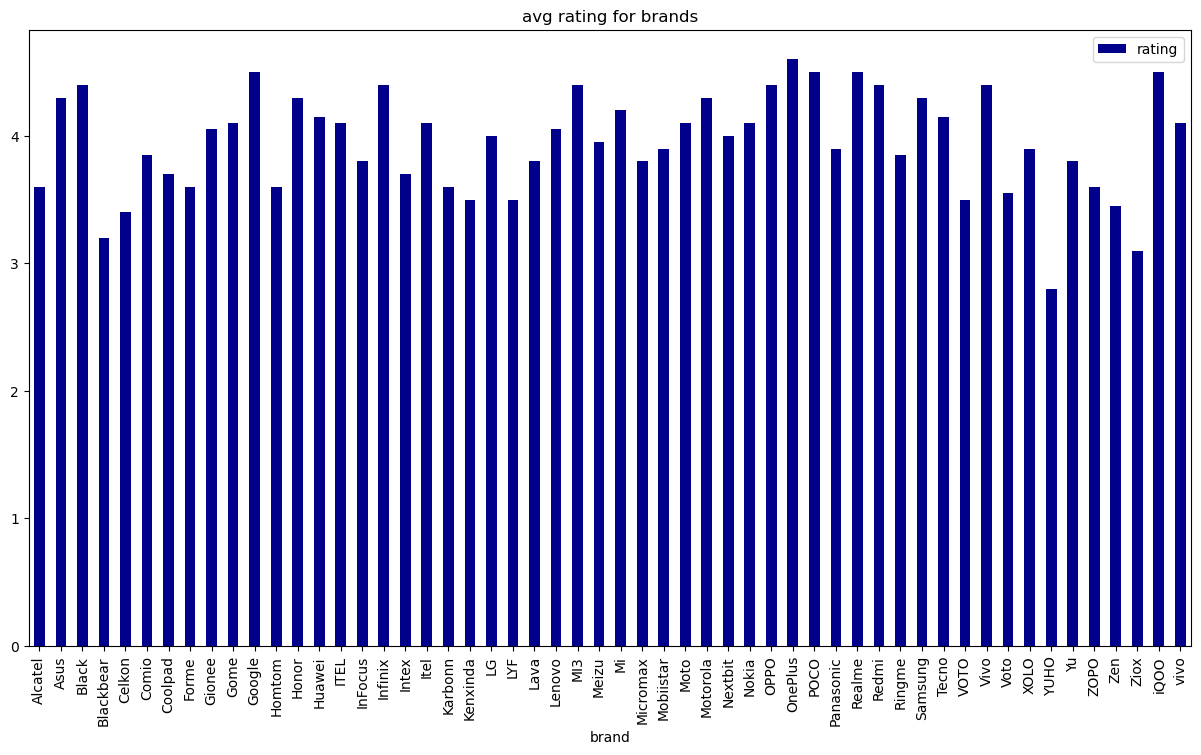

In [45]:
brands=data.groupby(by=['brand'])
brands['rating'].median().plot.bar(figsize=(15,8),legend=True ,color="darkblue",title="avg rating for brands")
print(brands['rating'].median().sort_values())

###### As expected, the costliest series of android devices like OnePlus has the highest rating of 4.60 and brands like 'iQOO,POCO,Realme,Google' stand second with median rating of 4.50. 'YUHO' is the lowest rated device brand with 2.80 rating.

In [46]:
data.groupby('brand').count()["display_quality"]

brand
Alcatel        5
Asus          19
Black          1
Blackbear      3
Celkon         2
Comio          2
Coolpad        5
Forme          2
Gionee        26
Gome           6
Google         4
Homtom         1
Honor         30
Huawei         2
ITEL           4
InFocus        2
Infinix       25
Intex          3
Itel          15
Karbonn       13
Kenxinda       2
LG            12
LYF            3
Lava          33
Lenovo        14
MI3            1
Meizu          4
Mi            12
Micromax      19
Mobiistar      6
Moto           9
Motorola       2
Nextbit        1
Nokia         26
OPPO          80
OnePlus       17
POCO          23
Panasonic     16
Realme       122
Redmi        124
Ringme         4
Samsung      133
Tecno         18
VOTO           1
Vivo          77
Voto           2
XOLO          10
YUHO           1
Yu             5
ZOPO           2
Zen            4
Ziox           1
iQOO           5
vivo           1
Name: display_quality, dtype: int64

In [47]:
pd.crosstab(data["brand"],data["display_quality"],margins=True ,margins_name="Total")

display_quality,Display,FWVGA,FWVGA+,Full,HD,HD+,HVGA,Quad,WVGA,quarter,Total
brand,,,,,,,,,,,
Alcatel,4,0,0,1,0,0,0,0,0,0,5
Asus,0,0,0,9,3,7,0,0,0,0,19
Black,1,0,0,0,0,0,0,0,0,0,1
Blackbear,0,0,0,0,3,0,0,0,0,0,3
Celkon,2,0,0,0,0,0,0,0,0,0,2
Comio,0,0,0,0,2,0,0,0,0,0,2
Coolpad,4,0,0,0,1,0,0,0,0,0,5
Forme,0,0,0,0,2,0,0,0,0,0,2
Gionee,1,0,0,6,7,12,0,0,0,0,26


In [48]:
display=data.groupby(by=['display_quality'])['price'].median().sort_values().reset_index()

In [49]:
display

,display_quality,price
0,HVGA,3015.5
1,WVGA,3550.0
2,FWVGA,3749.0
3,FWVGA+,4499.0
4,HD,5999.0
5,quarter,7069.5
6,HD+,9499.0
7,Display,11540.0
8,Full,16999.0
9,Quad,57800.0


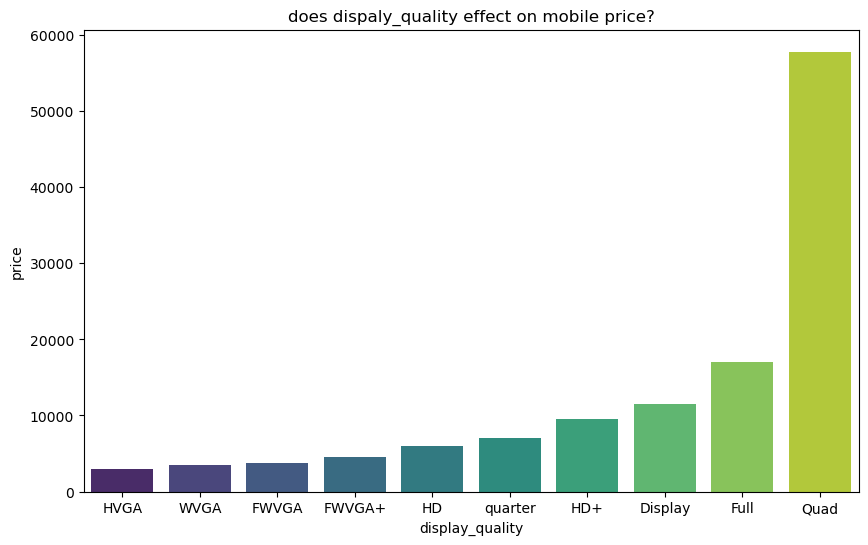

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=display["display_quality"], y=display["price"],palette="viridis")
plt.title("does dispaly_quality effect on mobile price?")
plt.show()

#### This shows us that Quad and Full HD display demand a lot of money from the buyer and HVGA demands the least

In [51]:
data.isnull().sum()


price                 0
rating                0
reviews               0
warranty              0
li-ion                0
battery_value         0
RAM_in_GB             0
ROM_in_GB             0
brand                 0
colour                0
model                 0
processor_name        0
rear_in_mp            0
front_in_mp           0
display_quality       0
display_size_in_cm    0
dtype: int64